Prodigy Infotech

Data Science Internship

Task - 03

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the data
data=pd.read_csv("/content/drive/MyDrive/bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
data.shape

(11162, 17)

In [ ]:
data.isnull().sum()/len(data.isnull().sum())*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


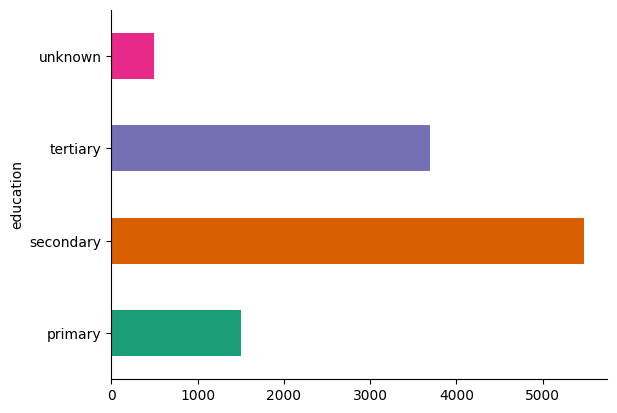

In [ ]:
#Barplot of Education
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

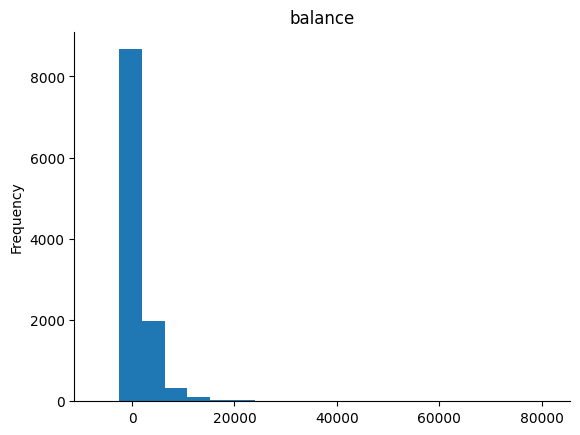

In [ ]:
#Histogram of 'Balance'
from matplotlib import pyplot as plt
data['balance'].plot(kind='hist', bins=20, title='balance')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X = data.drop(columns=['deposit'])
Y = data['deposit']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [ ]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)

# Transforming the test data using the same scaler
X_test_scaled = scaler.transform(X_test_encoded)

# Converting the scaled data to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)

In [ ]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 5],
    'max_features': [50,30,10]
}

In [ ]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Create a DecisionTreeClassifier
cl=DecisionTreeClassifier()
cl.fit(X_train_scaled_df,Y_train)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(cl, param_grid, cv=5)
grid_search.fit(X_train_scaled_df, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'max_features': [50, 30, 10],
                         'min_samples_leaf': [1, 4, 5],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# Get the best estimator and best parameters
best_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score= grid_search.best_score_

In [ ]:
print("Best hyperparameters:", best_params)
print("Best estimator:", best_classifier)
print("Best score:", best_score)

Best hyperparameters: {'max_depth': 7, 'max_features': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator: DecisionTreeClassifier(max_depth=7, max_features=30)
Best score: 0.812363859186059


In [ ]:
# Train the DecisionTreeClassifier on the full training set using the best hyperparameters
best_classifier.fit(X_train_scaled_df, Y_train)

DecisionTreeClassifier(max_depth=7, max_features=30)

In [ ]:
# Evaluate the model's performance on the test set
y_pred = best_classifier.predict(X_test_scaled_df)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7969543147208121


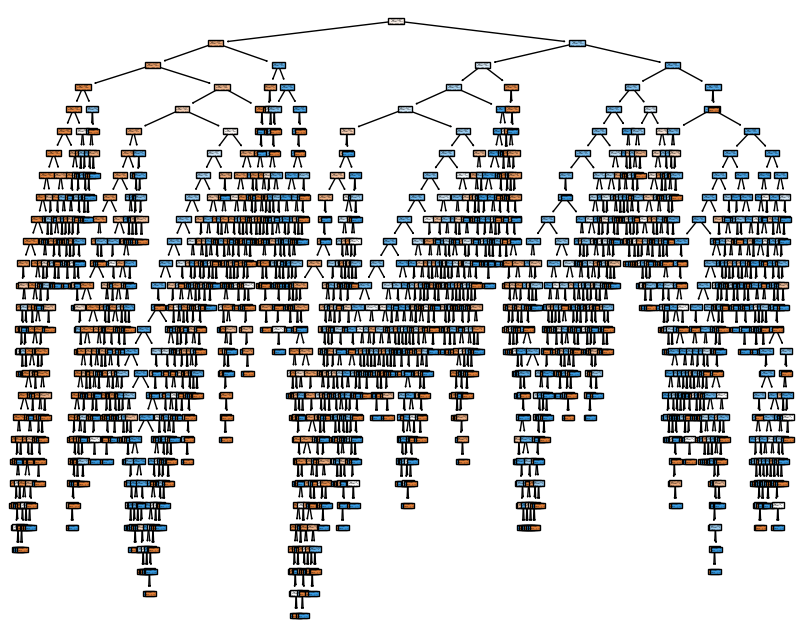

In [ ]:
plt.figure(figsize=(10, 8))
plot_tree(cl, filled=True)
plt.show()